In [1]:
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

os.listdir()

jobs = pd.read_excel('jobsandschools.xlsx', sheet_name=0).set_index(
    'Unnamed: 0').fillna(0).replace('X', 1).T

schools = pd.read_excel('jobsandschools.xlsx', sheet_name=1).set_index(
    'Unnamed: 0').fillna(0).replace('X', 1).T


In [2]:
def generate_kmeans_curve(data):

    Sum_of_squared_distances = []
    K = range(1,6)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(data)
        Sum_of_squared_distances.append(km.inertia_)

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

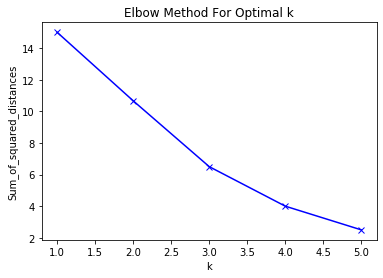

In [3]:
generate_kmeans_curve(schools)

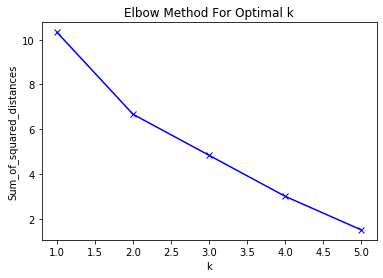

In [4]:
generate_kmeans_curve(jobs)

In [5]:
def fit_pca(data, model):
    output = model(n_components = 2).fit_transform(data)
    #output = model.transform(data)
    return pd.DataFrame(output, index = data.index)
    

def scatter(data, name, cluster_assignments):
    ax = data.plot.scatter(0, 1, c = [{0:'red', 1:'blue', 2:'green'}[c] for c in cluster_assignments])
    for i, txt in enumerate(data.index):
        ax.annotate(txt, (data.iloc[i, 0], data.iloc[i, 1]))
    plt.title(name)
    plt.savefig(name + '.png')
    plt.show()

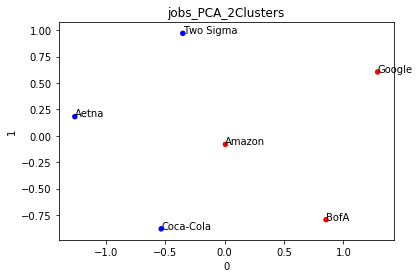

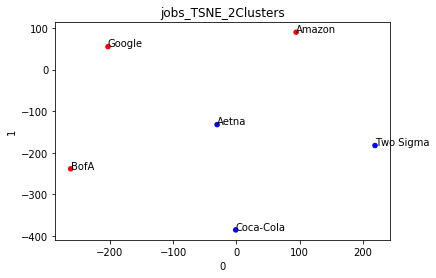

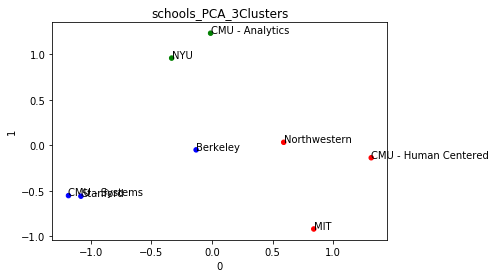

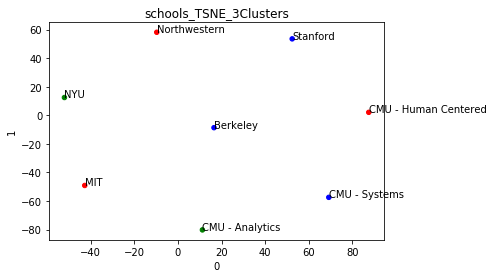

In [6]:
for raw_data, source_name, n_clusters in zip([jobs, schools], ['jobs', 'schools'], [2, 3]):
    cluster_assignments = KMeans(n_clusters=n_clusters).fit_predict(raw_data)
    for model, modelname in zip([PCA, TSNE], ['PCA', 'TSNE']):
        data = fit_pca(raw_data, model)
        scatter(data, source_name + '_' + modelname + '_' + str(max(cluster_assignments) + 1) + 'Clusters',
                cluster_assignments)

In [73]:
needed = pd.Series(jobs.mean(0).values - schools.mean(0).values, index = schools.columns)

In [74]:
needed.min()

-0.4166666666666667

In [75]:
norm_need = (needed - needed.min())/(needed.max()- needed.min()) * 2 - 1

In [76]:
needed = needed.to_frame()

In [77]:
needed.columns = ['need']

In [78]:
needed['jobs'] = jobs.mean(0).values
needed['schools'] = schools.mean(0).values

In [79]:


def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    return ['background-color: lightcoral' if s[column] > 0.1 else 
            'background-color: lightgreen' if s[column] < -.1 else ''
            for v in is_max]


needed = needed.round(2)

In [80]:
needed = needed[['jobs', 'schools', 'need']]

In [83]:
needed.index.name = None

In [86]:
needed.style.apply(highlight_greaterthan, threshold=0, column='need', axis=1).to_excel('need_summarized.xlsx')

//anaconda3/lib/python3.7/site-packages/pandas/io/formats/excel.py:307: CSSWarning: Unhandled color format: 'lightgreen'
  CSSWarning)
//anaconda3/lib/python3.7/site-packages/pandas/io/formats/excel.py:307: CSSWarning: Unhandled color format: 'lightcoral'
  CSSWarning)


In [108]:
import pandas as pd

# Create a Pandas dataframe from some data.
def sim_data():
    df = pd.DataFrame(columns = ['id', 'name', 'age'])
    df.loc[len(df), :] = [1, 'John', 21]
    df.loc[len(df), :] = [2, 'Mary', -1]
    df.loc[len(df), :] = [3, 'Ann', 0.01]
    df.loc[len(df), :] = [4, 'Ben', .01]
    return df
sim = sim_data()
def write_with_color(df, filename):
    
    writer = pd.ExcelWriter(filename, engine='xlsxwriter')
    sim.to_excel(writer, sheet_name='Sheet1')
    workbook  = writer.book
    worksheet = writer.sheets['Sheet1']

    red = workbook.add_format({'bg_color': '#FFC7CE'})
    green = workbook.add_format({'bg_color': '#CCFFCC'})

    start_row = 1
    start_col = 3
    end_row = len(df)
    end_cold = start_col

    worksheet.conditional_format(start_row, start_col, end_row, end_cold,
                                 {'type':     'cell',
                                  'criteria': '>',
                                  'value':    .1,
                                  'format':   red})

    worksheet.conditional_format(start_row, start_col, end_row, end_cold,
                                 {'type':     'cell',
                                  'criteria': '<',
                                  'value':    -.1,
                                  'format':   green})
    writer.save()
write_with_color(needed, 'needed.xlsx')

In [17]:
jobs.corr().dropna(how='all').dropna(how='all', axis=1).round(2)

Unnamed: 0,Mentions Python/Scripting languages,Mentions SQL/database languages,Mentions Big data technologies,Engineering Required,Engineering as a core focus,Modern Machine Learning math/research,Problem solving using machine learning,Business Communication/ interaction
Unnamed: 0,,,,,,,,
Mentions Python/Scripting languages,1.00,0.71,-0.25,0.25,0.50,0.50,0.25,-0.32
Mentions SQL/database languages,0.71,1.00,-0.71,0.00,0.71,0.00,0.00,-0.45
Mentions Big data technologies,-0.25,-0.71,1.00,-0.25,-0.50,0.25,0.50,0.32
Engineering Required,0.25,0.00,-0.25,1.00,0.50,0.50,-0.50,-0.32
Engineering as a core focus,0.50,0.71,-0.50,0.50,1.00,0.25,-0.25,-0.63
Modern Machine Learning math/research,0.50,0.00,0.25,0.50,0.25,1.00,0.50,-0.63
Problem solving using machine learning,0.25,0.00,0.50,-0.50,-0.25,0.50,1.00,-0.32
Business Communication/ interaction,-0.32,-0.45,0.32,-0.32,-0.63,-0.63,-0.32,1.00


In [15]:
schools.T.corr().round(2)

,NYU,CMU - Systems,CMU - Analytics,CMU - Human Centered,Northwestern,MIT,Stanford,Berkeley
NYU,1.00,0.25,0.82,0.00,0.41,0.00,0.41,0.27
CMU - Systems,0.25,1.00,0.00,-0.41,-0.41,0.00,0.61,-0.27
CMU - Analytics,0.82,0.00,1.00,0.20,0.50,-0.20,0.00,0.33
CMU - Human Centered,0.00,-0.41,0.20,1.00,0.50,0.60,-0.50,0.33
Northwestern,0.41,-0.41,0.50,0.50,1.00,0.50,-0.25,-0.17
MIT,0.00,0.00,-0.20,0.60,0.50,1.00,0.00,-0.33
Stanford,0.41,0.61,0.00,-0.50,-0.25,0.00,1.00,-0.17
Berkeley,0.27,-0.27,0.33,0.33,-0.17,-0.33,-0.17,1.00


In [18]:
jobs.T.corr().round(2)

,Google,Amazon,BofA,Two Sigma,Aetna,Coca-Cola
Google,1.00,0.10,0.22,-0.25,-0.50,-0.10
Amazon,0.10,1.00,0.36,0.10,0.41,0.25
BofA,0.22,0.36,1.00,-0.33,-0.22,0.53
Two Sigma,-0.25,0.10,-0.33,1.00,0.50,0.41
Aetna,-0.50,0.41,-0.22,0.50,1.00,0.41
Coca-Cola,-0.10,0.25,0.53,0.41,0.41,1.00
